___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/1400/1*ZFuMI_HrI3jt2Wlay73IUQ.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2025
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://miro.medium.com/max/1400/1*ZFuMI_HrI3jt2Wlay73IUQ.png</p>

### <font color= #2E9AFE> Tema: Modelos basados en Árboles Parte II</font>

### Bosques Aleatorios

"Los árboles tienen un sólo aspecto que previene que sean la herramienta ideal para el aprendizaje predictivo, que es la **inexactitud**" 

**Pasos para crear un bosque aleatorio:**
- Crear un dataset "bootstrapped"
- Crear un árbol de decisión usando el dataset "bootstrapped", pero sólo usar un subconjunto aleatorio de variables (o columnas) en cada paso. 
- Regresar al paso 1. y repetir 

Gracias al proceso de bootstrapping, el requerimento de dividir los datos en prueba y entrenamiento no es tan estricto. Se recomienda dividir los datos en prueba y entrenamiento cuando se quiere comparar su desempeño contra otros modelos. 

**Hiperparámetros:**
- max_depth: Puedo limitar hasta qué profundidad quiero que crezca cada árbol en mi bosque aleatorio.
- min_sample_split: le indica al árbol el número mínimo de observaciones requeridas en cualquier nodo dado para dividirlo.
- min_samples_leaf: le indica al árbol el número mínimo de observaciones requeridas en la hoja final.
- n_estimators: numero de árboles

In [2]:
#pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time
import pandas as pd

In [3]:
# Generar datos -->
# es un ejemplo donde vamos a observar información sobre casas de una inmobiliaria para predecir el precio de renta
np.random.seed(42)
n_samples = 200
square_footage = np.random.uniform(800, 4000, n_samples) 
num_rooms = np.random.randint(2, 7, n_samples)
distance_to_city = np.random.uniform(0.5, 30, n_samples)

# Variable del precio (no lineal)  y tiene ruido
price = (square_footage * 200) + (num_rooms * 5000) - (distance_to_city * 1500)
price += np.random.normal(0, 20000, n_samples)

data = pd.DataFrame({
    'Square Footage': square_footage,
    'Number of Rooms': num_rooms,
    'Distance to City (Miles)': distance_to_city,
    'Price': price
})

In [4]:
data.head()

,Square Footage,Number of Rooms,Distance to City (Miles),Price
0,1998.528380,5,28.855122,357757.823360
1,3842.285781,4,27.207844,706860.746641
2,3142.380614,2,6.275838,623674.228356
3,2715.707149,5,2.546158,578673.037438
4,1299.259649,5,3.472951,309689.644364


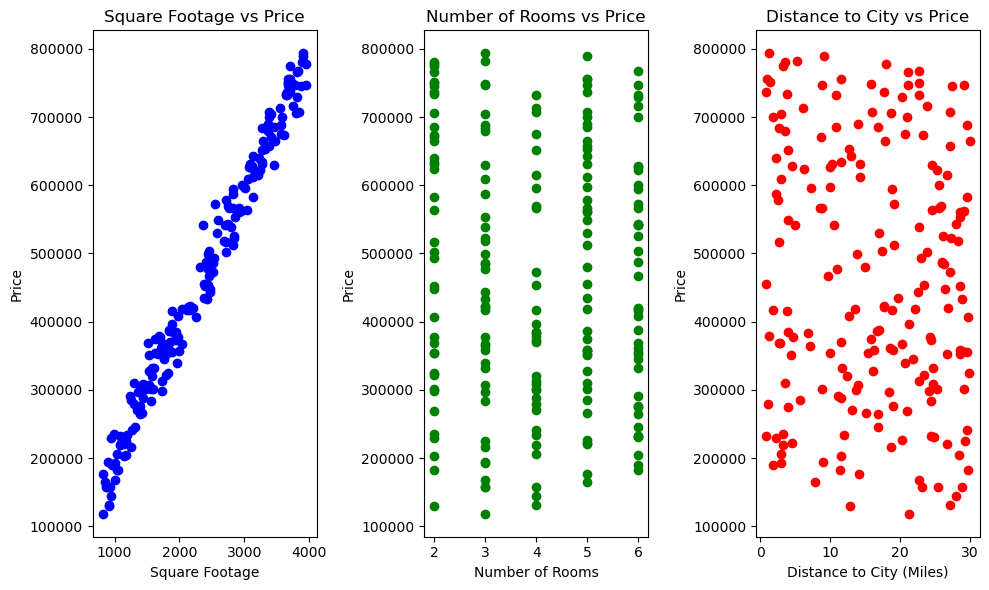

In [5]:
#Observar datos
plt.figure(figsize=(10, 6))

# Tamaño vs precio
plt.subplot(1, 3, 1)
plt.scatter(data['Square Footage'], data['Price'], color='blue')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Square Footage vs Price')

# Numero de cuartos vs precio
plt.subplot(1, 3, 2)
plt.scatter(data['Number of Rooms'], data['Price'], color='green')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Number of Rooms vs Price')

# Distancia ciudad vs precio
plt.subplot(1, 3, 3)
plt.scatter(data['Distance to City (Miles)'], data['Price'], color='red')
plt.xlabel('Distance to City (Miles)')
plt.ylabel('Price')
plt.title('Distance to City vs Price')

plt.tight_layout()
plt.show()

In [6]:
data.head()

,Square Footage,Number of Rooms,Distance to City (Miles),Price
0,1998.528380,5,28.855122,357757.823360
1,3842.285781,4,27.207844,706860.746641
2,3142.380614,2,6.275838,623674.228356
3,2715.707149,5,2.546158,578673.037438
4,1299.259649,5,3.472951,309689.644364


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Square Footage            200 non-null    float64
 1   Number of Rooms           200 non-null    int64  
 2   Distance to City (Miles)  200 non-null    float64
 3   Price                     200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [8]:
#Separar en train test split
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=0,
                                                    shuffle=True)

In [9]:
#construir y entrenar el árbol

#construir el modelo
model = RandomForestRegressor(n_estimators=100,#cuántos árboles queremos
                               criterion='squared_error', #error cuadrático
                               max_depth=None, #si dejo None puede el árbol ir a su máxima profundidad -> overfitting
                               min_samples_split=2, #cuántos datos se necesitan para que haga un split
                               min_samples_leaf=2, #cuántos datos dejamos en la última hoja
                               bootstrap=True, #¿que haga bootstrapping?
                               oob_score=False, 
                               random_state=0, #semilla
                               verbose=0)
#calcular cuánto tarda
start_time = time.time()

#Entrenar el modelo
model = model.fit(X_train,y_train.values.ravel()) 
print("--- %s seconds ---" % (time.time() - start_time))

# Prediciendo en los datos de entrenamiento y prueba 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print('R2 = %0.4f'%model.score(X_test,y_test))


--- 0.042285919189453125 seconds ---
R2 = 0.9880


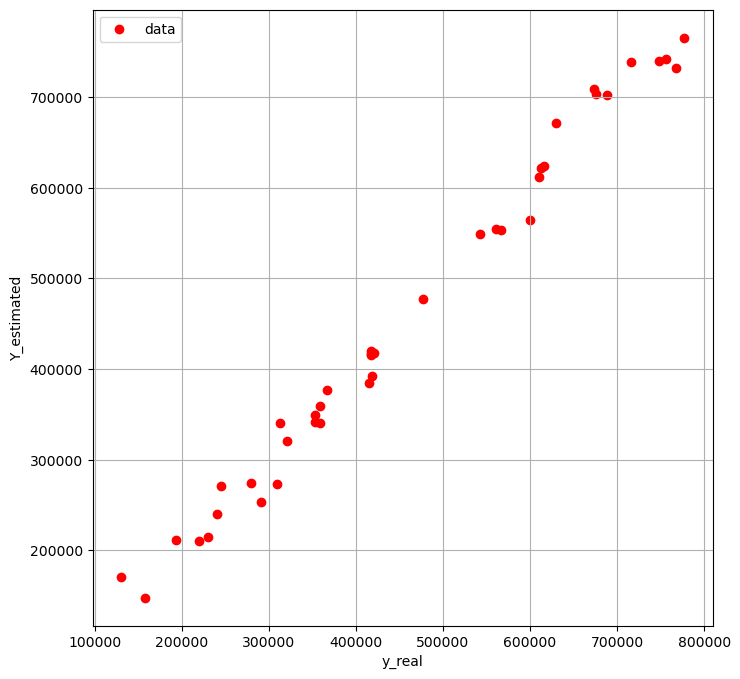

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_test_pred,c='r',label='data')
plt.xlabel('y_real')
plt.ylabel('Y_estimated')
plt.grid()
plt.legend()
plt.show()

[Text(0.52099609375, 0.9444444444444444, 'x[0] <= 2610.811\nsquared_error = 39672455031.021\nsamples = 102\nvalue = 482684.701'),
 Text(0.2646484375, 0.8333333333333334, 'x[0] <= 1431.518\nsquared_error = 10067347331.408\nsamples = 58\nvalue = 311568.45'),
 Text(0.392822265625, 0.8888888888888888, 'True  '),
 Text(0.12890625, 0.7222222222222222, 'x[0] <= 1298.317\nsquared_error = 1895405787.167\nsamples = 22\nvalue = 211802.313'),
 Text(0.0859375, 0.6111111111111112, 'x[0] <= 956.687\nsquared_error = 990247728.39\nsamples = 17\nvalue = 195115.496'),
 Text(0.046875, 0.5, 'x[2] <= 25.197\nsquared_error = 461983874.396\nsamples = 6\nvalue = 159395.201'),
 Text(0.03125, 0.3888888888888889, 'x[2] <= 11.554\nsquared_error = 155126067.182\nsamples = 4\nvalue = 173908.711'),
 Text(0.015625, 0.2777777777777778, 'squared_error = 210482320.341\nsamples = 2\nvalue = 179985.759'),
 Text(0.046875, 0.2777777777777778, 'squared_error = 77187990.675\nsamples = 2\nvalue = 169857.345'),
 Text(0.0625, 0.3

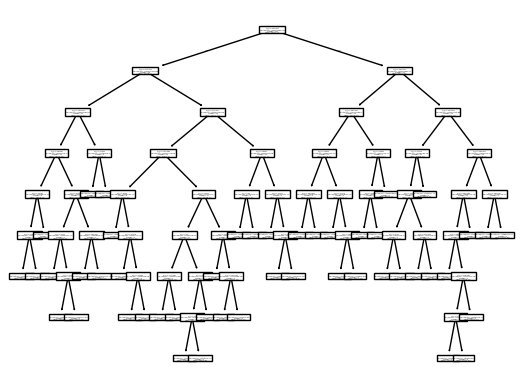

In [11]:
# si yo quisiera ver sólo un árbol
#NO se puede imprimir todo el bosque aleatorio, sólo se puede imprimir árbol por árbol
from sklearn import tree
tree.plot_tree(model.estimators_[0]) 

Parece que está sobreajustando...

### GridsearchCV para tunear hiperarámetros

Utilicemos cross validation para optimizar hiperparámetros. 

Antes de hacer el GridsearchCV vamos viendo los hiperparámetros cómo se desarrollan contra las métricas de performance para elegir la mejor malla de valores

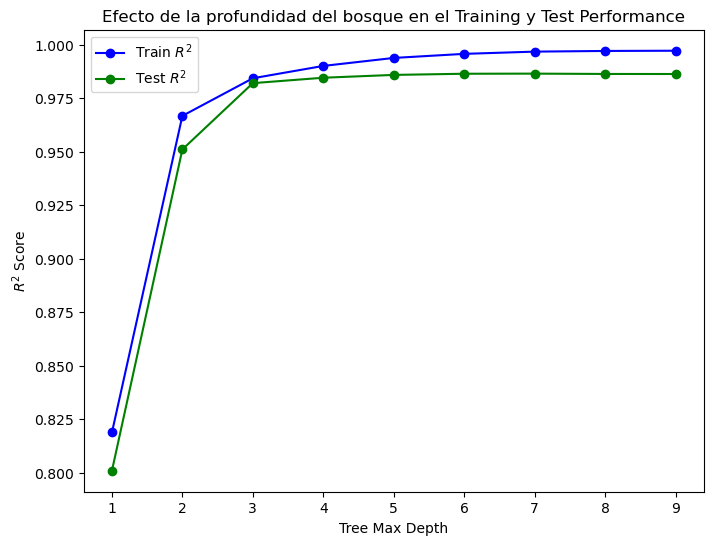

In [17]:
#graficamos la profundidad vs la R2
max_depths = range(1, 10)
train_scores = []
test_scores = []

for max_depth in max_depths:
    tree_reg = RandomForestRegressor(max_depth=max_depth, random_state=42)
    tree_reg.fit(X_train, y_train.values.ravel())
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(max_depths, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(max_depths, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la profundidad del bosque en el Training y Test Performance')
plt.legend()
plt.show()


Podríamos probar la malla entre 1 y 3 profundidades

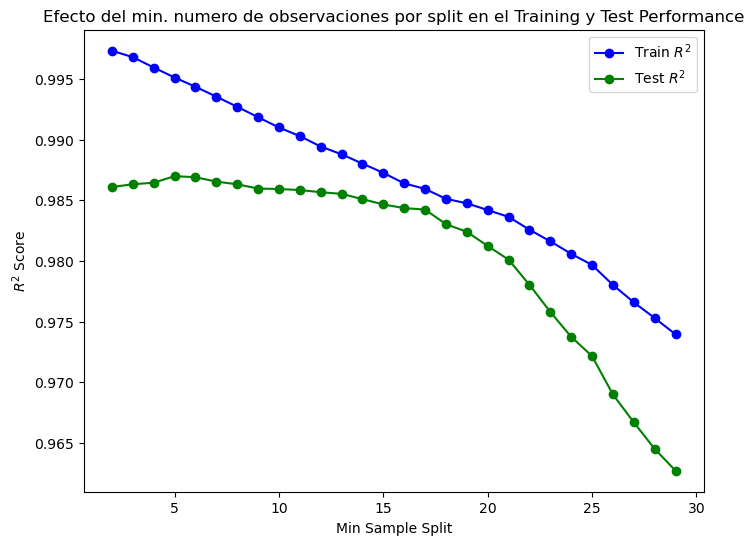

In [25]:
#graficamos el min_sample_split vs la R2
min_samples_splits = range(2, 30)
train_scores = []
test_scores = []

for min_samples_split in min_samples_splits:
    tree_reg = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)
    tree_reg.fit(X_train, y_train.values.ravel())
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(min_samples_splits, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(min_samples_splits, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Min Sample Split')
plt.ylabel('$R^2$ Score')
plt.title('Efecto del min. numero de observaciones por split en el Training y Test Performance')
plt.legend()
plt.show()

Podríamos probar la malla entre 15 y 30 min_samples_split

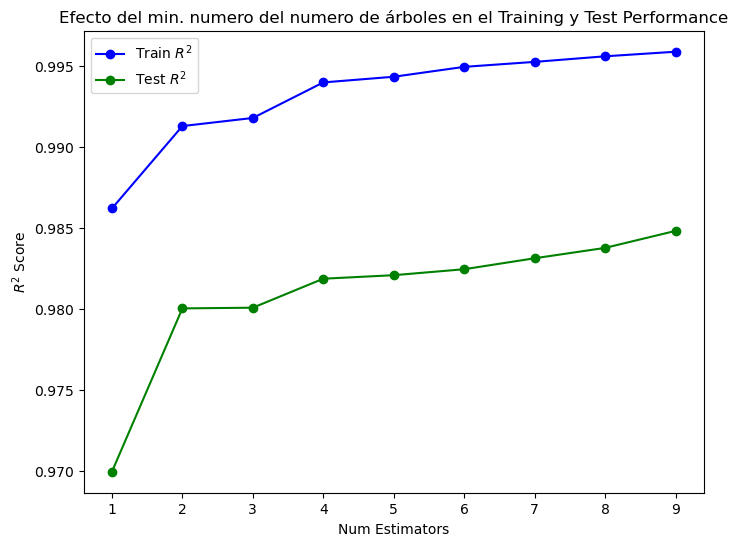

In [30]:
#graficamos el n_estimators vs la R2
n_estimators = range(1, 10)
train_scores = []
test_scores = []

for n_estimator in n_estimators:
    tree_reg = RandomForestRegressor(n_estimators=n_estimator, random_state=42)
    tree_reg.fit(X_train, y_train.values.ravel())
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_estimators, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(n_estimators, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Num Estimators')
plt.ylabel('$R^2$ Score')
plt.title('Efecto del min. numero del numero de árboles en el Training y Test Performance')
plt.legend()
plt.show()

Podemos probar entre 1 y 3 árboles

In [33]:
#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(criterion='squared_error',
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 3), #profundidad máxima
                                'min_samples_split': range(15, 30, 1), #minimo numero de observaciones por split
                                'n_estimators': range(1,3,1)}, # número de árboles en el bosque
                  cv=2,
                  scoring='neg_mean_squared_error')
#Entrenamiento
gs.fit(X_train, y_train.values.ravel())



GridSearchCV(cv=2,
             estimator=RandomForestRegressor(min_samples_leaf=2,
                                             random_state=0),
             param_grid={'max_depth': range(1, 3),
                         'min_samples_split': range(15, 30),
                         'n_estimators': range(1, 3)},
             scoring='neg_mean_squared_error')

In [35]:
#Imprimir parámetros óptimos
print(gs.best_params_)

{'max_depth': 2, 'min_samples_split': 15, 'n_estimators': 2}


In [37]:
#crear modelo usando parámetros óptimos
new_model = RandomForestRegressor(n_estimators=2,
                               criterion='squared_error',
                               max_depth=2,
                               min_samples_split=15,
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Entrenamiento
new_model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=2, min_samples_leaf=2, min_samples_split=15,
                      n_estimators=2, random_state=0)

In [39]:
from sklearn.metrics import r2_score
yhat = new_model.predict(X_test)
R2_score = r2_score(y_test,yhat)
print('R2:', R2_score)

R2: 0.938178777134852


In [41]:
from sklearn.metrics import mean_squared_error
MSE_score = mean_squared_error(y_test,yhat)
print('MSE:', MSE_score)

MSE: 2140480123.7806382


In [43]:
#ver cuáles son las variables más importantes para el modelo
new_model.feature_importances_

array([1., 0., 0.])

<Axes: >

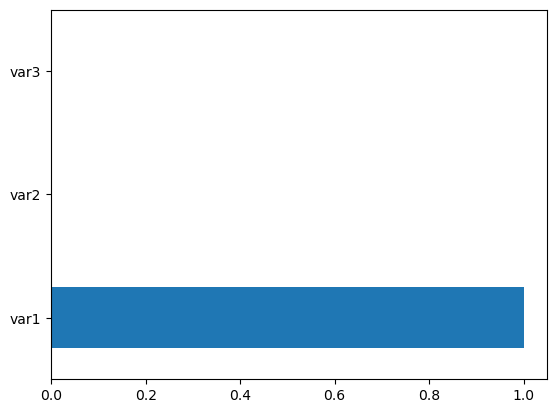

In [45]:
import pandas as pd
cols=['var1','var2','var3']
(pd.Series(new_model.feature_importances_, index=cols)
   .nlargest(3)
   .plot(kind='barh')) 

**Ventajas**

- Son muy buenos generalizando
- Protejen en contra del sobreajuste (overfitting) gracias a la construcción del bootstrapping 
- También reducen la varianza y por lo tanto mejoran la precisión del modelo
- Funcionan muy bien con variables categóricas y variables continuas
- No se requiere escalamiento previo de variables 
- Son modelos robustos ante valores atípicos (outliers)
- Son algoritmos muy estables, cuando hay datos nuevos, el algoritmo no se ve muy afectado. Ya que este nuevo dato puede afectar a un árbol individual, pero es difícil que impacte a todos los árboles. 

**Desventajas**

- Complejidad. Los bosques aleatorios crean muchos árboles y combina sus resultados. Requiere mucho poder computacional y recursos 
- Periodos de entrenamiento largos. Requieren más tiempo de entrenamiento. 